In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [3]:
scanners = [
    'C400A2E19293', # R1824
    'CD4533FFC0E1', # R1836
    'D2B6503554D7', # R1826
    'DB8B36A69C56', # R1840
    'DD697EA75B68', # R1835
    'DF231643E227', # R1830
    'E13B805C6CB0', # R1825
    'E43355CA8B96', # R1833
    'E6D9D20DD197', # R1831
    'E8FD0B453DC4', # R1837
    'E96AF2C858BA', # R1827
    'EC72840D9AD3', # R1823
    'F1307ECB3B90', # R1834
    'F1EDAF28E08A', # R1821
    'F69A86823B96', # R1828
    'FB2EE01C18CE', # R1829
    'FDAE5980F28C'  # R1832
]

In [4]:
rawData = pd.read_csv("../Data/rssi2.csv")
rawData.drop("name", axis=1, inplace=True)

In [5]:
rawData

,time,beacon,location,rssi,scanner
0,1575014971455000000,0117C55D14E4,V1_23,-76,F69A86823B96
1,1575014971482000000,0117C55D14E4,V1_23,-87,DB8B36A69C56
2,1575014971498000000,0117C55D14E4,V1_23,-95,E8FD0B453DC4
3,1575014971539000000,0117C55D14E4,V1_23,-67,E96AF2C858BA
4,1575014971539000000,0117C55D14E4,V1_23,-63,DF231643E227
...,...,...,...,...,...
32850,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
32851,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
32852,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
32853,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [6]:
B1 = rawData[rawData["beacon"] == "0117C55D14E4"]
B1

,time,beacon,location,rssi,scanner
0,1575014971455000000,0117C55D14E4,V1_23,-76,F69A86823B96
1,1575014971482000000,0117C55D14E4,V1_23,-87,DB8B36A69C56
2,1575014971498000000,0117C55D14E4,V1_23,-95,E8FD0B453DC4
3,1575014971539000000,0117C55D14E4,V1_23,-67,E96AF2C858BA
4,1575014971539000000,0117C55D14E4,V1_23,-63,DF231643E227
...,...,...,...,...,...
32850,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
32851,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
32852,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
32853,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [7]:
B1 = B1.pivot_table(columns="scanner", values="rssi", index=["time", "location"]).rename_axis(None, axis=1).reset_index()

In [8]:
B1["time"] = pd.to_datetime(B1["time"])
B1

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-11-29 08:09:31.455,V1_23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.0,NaN,NaN
1,2019-11-29 08:09:31.482,V1_23,NaN,NaN,NaN,-87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-29 08:09:31.498,V1_23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-29 08:09:31.539,V1_23,NaN,NaN,NaN,NaN,NaN,-63.0,NaN,NaN,NaN,NaN,-67.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-29 08:09:31.556,V1_23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,-76.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29617,2019-12-03 08:43:25.486,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,NaN
29618,2019-12-03 08:43:25.549,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29619,2019-12-03 08:43:25.552,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,NaN,NaN,NaN,NaN
29620,2019-12-03 08:43:25.554,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pinData = pd.read_csv("../Documents/Pin", sep='\t')
pinData.head()

,Id,X,Y
0,V1_1,10.747900,2.29302
1,V1_10,11.176600,5.29753
2,V1_11,14.063600,5.31235
3,V1_12,17.173201,5.21713
4,V1_13,20.171700,5.12133


In [10]:
pinDataMap = pinData.set_index("Id").transpose()
toCoor = pinDataMap.to_dict()

In [11]:
B1 = B1.groupby(["location", pd.Grouper(key="time", freq="5s")]).mean().reset_index()
B1

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,-79.500000,-66.666667,-75.000000,-72.800000,-70.666667,-76.300000,NaN,-82.333333,-83.166667,-92.333333,-81.000000,-58.181818,-66.750000,-87.166667,-71.500000,-91.000000,-75.750000
1,V1_12,2019-12-02 01:30:05,-76.666667,-66.142857,-72.666667,-74.000000,-73.500000,-74.250000,-84.666667,-83.333333,-83.750000,-89.000000,-84.500000,-58.333333,-69.500000,-89.000000,-73.300000,-94.000000,-75.000000
2,V1_12,2019-12-02 01:30:10,-75.875000,-65.750000,-74.250000,-74.400000,-73.166667,-77.666667,-81.444444,-83.000000,-83.818182,-90.800000,-84.833333,-58.181818,-69.444444,-90.444444,-72.600000,-93.000000,-75.333333
3,V1_12,2019-12-02 01:30:15,-76.800000,-66.500000,-76.166667,-74.666667,-72.333333,-75.400000,-80.250000,-84.600000,-86.666667,-90.000000,-90.000000,-59.071429,-67.444444,-90.333333,-73.500000,-91.666667,-74.875000
4,V1_12,2019-12-02 01:30:20,-80.900000,NaN,-73.500000,-72.800000,-75.909091,-76.333333,-80.000000,-85.000000,-89.000000,-91.666667,-83.333333,-58.285714,-69.600000,-90.142857,-72.071429,-92.666667,-75.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,V1_32,2019-12-03 08:27:45,-89.000000,-83.000000,-84.000000,-90.000000,-89.500000,-70.200000,-77.000000,-92.500000,-68.428571,-93.000000,-55.750000,-83.000000,NaN,NaN,-83.250000,-72.428571,-85.000000
310,V1_32,2019-12-03 08:27:50,-88.666667,-82.600000,-83.000000,-92.500000,-90.500000,-74.142857,-82.000000,-94.000000,-69.750000,NaN,-56.529412,-82.428571,-84.000000,NaN,-83.666667,-71.285714,-84.600000
311,V1_32,2019-12-03 08:27:55,-87.500000,-79.500000,-83.400000,-92.333333,NaN,-75.333333,-78.714286,-94.000000,-69.695652,-94.000000,-58.058824,-79.666667,-84.500000,NaN,NaN,-70.363636,-85.000000
312,V1_32,2019-12-03 08:28:00,-92.000000,-81.428571,-82.000000,-87.000000,-87.000000,-77.000000,-75.222222,NaN,-69.692308,-95.000000,-58.800000,-80.750000,-81.500000,NaN,NaN,-72.700000,-85.250000


In [12]:
B1["X"] = B1["location"].apply(lambda x: toCoor[x]["X"])
B1["Y"] = B1["location"].apply(lambda x: toCoor[x]["Y"])

In [13]:
V1_23 = B1[B1["location"] == "V1_23"]

In [14]:
V1_23.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,36.000000,38.000000,38.000000,36.000000,31.000000,39.000000,39.000000,36.000000,39.000000,34.000000,39.000000,39.000000,37.000000,9.000000,39.000000,39.000000,34.000000,39.0000,3.900000e+01
mean,-83.754525,-73.043832,-83.074085,-83.685539,-75.473547,-65.601565,-74.227525,-84.969666,-69.769337,-91.533577,-66.670295,-78.057133,-74.143207,-94.722222,-75.262004,-77.387007,-83.100840,27.1516,8.159480e+00
std,4.642962,1.150775,2.269097,3.634356,5.062129,1.626096,1.679795,3.153240,1.007240,2.292612,0.834218,1.970296,1.937390,1.252775,4.059485,3.306672,4.302128,0.0000,5.398735e-15
min,-91.000000,-75.428571,-87.285714,-88.333333,-96.000000,-68.916667,-79.000000,-93.000000,-72.750000,-97.000000,-67.615385,-85.000000,-78.600000,-96.000000,-89.000000,-83.333333,-92.000000,27.1516,8.159480e+00
25%,-89.125000,-73.843750,-84.638889,-86.697802,-77.000000,-66.478571,-75.468750,-87.125000,-70.494048,-93.291667,-67.296703,-79.200000,-75.181818,-96.000000,-77.000000,-79.783333,-85.625000,27.1516,8.159480e+00
50%,-81.958333,-73.000000,-83.225000,-84.666667,-74.833333,-65.562500,-73.909091,-83.633333,-69.750000,-91.083333,-67.000000,-77.750000,-74.210526,-95.000000,-75.478261,-78.333333,-81.300000,27.1516,8.159480e+00
75%,-80.544444,-72.314286,-82.500000,-80.650000,-71.950000,-64.700000,-73.214286,-82.563187,-68.864253,-90.083333,-66.215714,-77.000000,-73.000000,-94.000000,-71.763636,-74.330769,-80.000000,27.1516,8.159480e+00
max,-77.000000,-71.000000,-77.000000,-77.000000,-69.818182,-62.500000,-71.100000,-82.000000,-68.214286,-87.000000,-65.000000,-74.333333,-70.400000,-93.000000,-69.200000,-71.937500,-78.000000,27.1516,8.159480e+00


In [15]:
V1_32 = B1[B1["location"] == "V1_32"]

In [16]:
V1_32.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,22.000000,25.000000,23.000000,23.000000,24.000000,26.000000,26.000000,23.000000,26.000000,19.000000,25.000000,26.000000,24.000000,11.000000,24.000000,26.000000,24.000000,2.600000e+01,26.000
mean,-90.232576,-80.472275,-81.378882,-87.320652,-82.123076,-70.805803,-77.515197,-92.608592,-70.498040,-94.776316,-60.988989,-80.398260,-82.962004,-93.642424,-80.696059,-72.162877,-85.717966,2.968940e+01,11.286
std,2.761448,1.595399,1.471474,3.155650,6.025371,3.848593,3.998316,1.364795,1.838772,1.701046,3.216608,4.063998,3.292557,1.223187,2.796577,1.660427,1.457221,3.623071e-15,0.000
min,-95.000000,-84.000000,-84.000000,-94.500000,-91.000000,-77.333333,-89.000000,-96.000000,-73.739130,-97.500000,-65.315789,-92.000000,-92.000000,-96.000000,-85.000000,-77.000000,-89.000000,2.968940e+01,11.286
25%,-92.000000,-81.428571,-82.000000,-89.250000,-87.750000,-73.816667,-78.660714,-93.250000,-71.849650,-96.000000,-63.600000,-82.707143,-84.000000,-94.533333,-83.250000,-73.092657,-86.750000,2.968940e+01,11.286
50%,-89.875000,-80.000000,-81.250000,-86.916667,-80.000000,-69.558333,-76.016667,-92.500000,-70.460663,-95.000000,-62.400000,-80.000000,-82.657143,-93.250000,-80.666667,-72.091667,-85.500000,2.968940e+01,11.286
75%,-87.791667,-79.500000,-80.291667,-84.741667,-76.708333,-67.321429,-75.022727,-91.857143,-68.800824,-94.250000,-57.952381,-78.395833,-80.250000,-92.750000,-78.452381,-71.318452,-84.592857,2.968940e+01,11.286
max,-85.500000,-77.500000,-77.857143,-83.222222,-74.000000,-66.250000,-73.818182,-90.000000,-67.666667,-91.000000,-55.750000,-72.600000,-79.333333,-92.250000,-75.714286,-68.428571,-83.222222,2.968940e+01,11.286


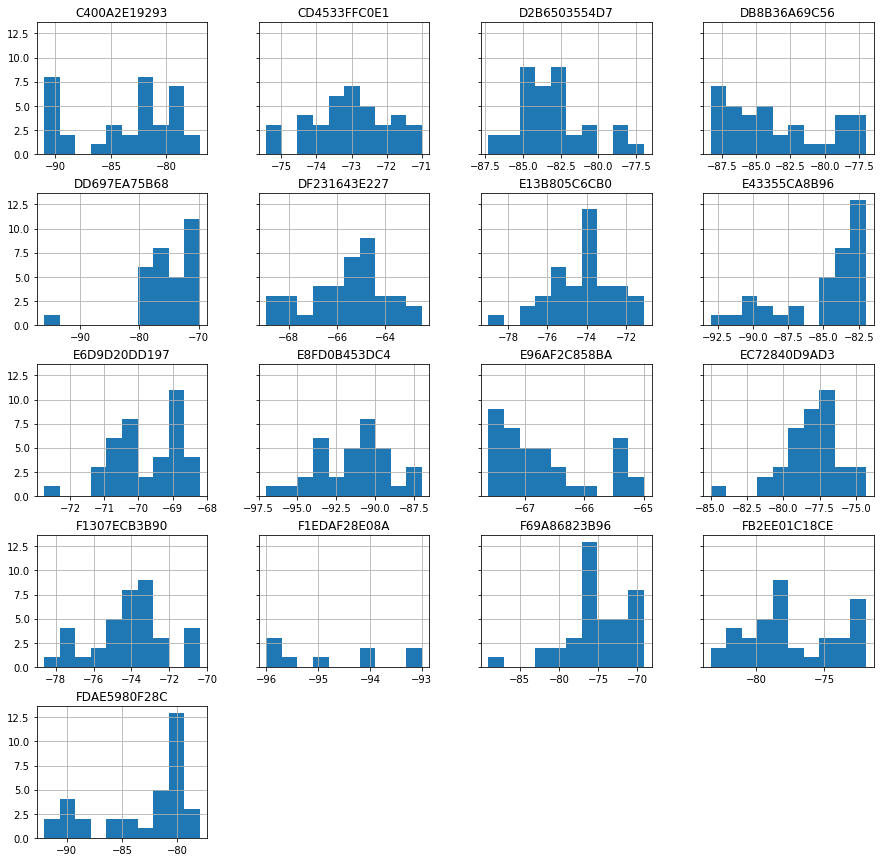

In [17]:
V1_23.drop(["X", "Y"], axis=1).hist(figsize=(15,15), sharey=True)
plt.show()

In [18]:
V1_23.mean()

C400A2E19293   -83.754525
CD4533FFC0E1   -73.043832
D2B6503554D7   -83.074085
DB8B36A69C56   -83.685539
DD697EA75B68   -75.473547
DF231643E227   -65.601565
E13B805C6CB0   -74.227525
E43355CA8B96   -84.969666
E6D9D20DD197   -69.769337
E8FD0B453DC4   -91.533577
E96AF2C858BA   -66.670295
EC72840D9AD3   -78.057133
F1307ECB3B90   -74.143207
F1EDAF28E08A   -94.722222
F69A86823B96   -75.262004
FB2EE01C18CE   -77.387007
FDAE5980F28C   -83.100840
X               27.151600
Y                8.159480
dtype: float64

In [19]:
data = B1.drop(["location", "time"], axis=1)

In [20]:
data

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,-79.500000,-66.666667,-75.000000,-72.800000,-70.666667,-76.300000,NaN,-82.333333,-83.166667,-92.333333,-81.000000,-58.181818,-66.750000,-87.166667,-71.500000,-91.000000,-75.750000,17.173201,5.21713
1,-76.666667,-66.142857,-72.666667,-74.000000,-73.500000,-74.250000,-84.666667,-83.333333,-83.750000,-89.000000,-84.500000,-58.333333,-69.500000,-89.000000,-73.300000,-94.000000,-75.000000,17.173201,5.21713
2,-75.875000,-65.750000,-74.250000,-74.400000,-73.166667,-77.666667,-81.444444,-83.000000,-83.818182,-90.800000,-84.833333,-58.181818,-69.444444,-90.444444,-72.600000,-93.000000,-75.333333,17.173201,5.21713
3,-76.800000,-66.500000,-76.166667,-74.666667,-72.333333,-75.400000,-80.250000,-84.600000,-86.666667,-90.000000,-90.000000,-59.071429,-67.444444,-90.333333,-73.500000,-91.666667,-74.875000,17.173201,5.21713
4,-80.900000,NaN,-73.500000,-72.800000,-75.909091,-76.333333,-80.000000,-85.000000,-89.000000,-91.666667,-83.333333,-58.285714,-69.600000,-90.142857,-72.071429,-92.666667,-75.100000,17.173201,5.21713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,-89.000000,-83.000000,-84.000000,-90.000000,-89.500000,-70.200000,-77.000000,-92.500000,-68.428571,-93.000000,-55.750000,-83.000000,NaN,NaN,-83.250000,-72.428571,-85.000000,29.689400,11.28600
310,-88.666667,-82.600000,-83.000000,-92.500000,-90.500000,-74.142857,-82.000000,-94.000000,-69.750000,NaN,-56.529412,-82.428571,-84.000000,NaN,-83.666667,-71.285714,-84.600000,29.689400,11.28600
311,-87.500000,-79.500000,-83.400000,-92.333333,NaN,-75.333333,-78.714286,-94.000000,-69.695652,-94.000000,-58.058824,-79.666667,-84.500000,NaN,NaN,-70.363636,-85.000000,29.689400,11.28600
312,-92.000000,-81.428571,-82.000000,-87.000000,-87.000000,-77.000000,-75.222222,NaN,-69.692308,-95.000000,-58.800000,-80.750000,-81.500000,NaN,NaN,-72.700000,-85.250000,29.689400,11.28600


In [21]:
X = data[scanners]
y = data[["X", "Y"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

In [23]:
train = pd.concat([X_train, y_train], axis=1)
train.update(train.groupby(["X", "Y"])[scanners].ffill().fillna(-95))

In [24]:
test = pd.concat([X_test, y_test], axis=1)
test.update(test.groupby(["X", "Y"])[scanners].ffill().fillna(-95))

In [25]:
reg = Ridge(alpha=1)
reg.fit(train[scanners], train[["X", "Y"]])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [26]:
reg.score(test[scanners], test[["X", "Y"]])

/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9124567837280125

In [27]:
reg.predict(test[scanners].iloc[0:2, :])

array([[30.09421697,  9.59388871],
       [27.85506348,  9.03311532]])

In [28]:
test[["X", "Y"]].head(2)

,X,Y
288,29.6894,11.28600
160,27.1516,8.15948


In [29]:
joblib.dump(reg, "../Models/ridge")

['../Models/ridge']